LAB 1 DISTANCE DEPENDENTS OF RADIATION
Diego McHenry
Partner: Julia Gelfond
February 5, 2024

Introduction: We will use a Geiger-Mueller counter to measure radiation at a variety of distances to find the relations between the two.

Set Up: Our Geiger-Mueller counter is attatched to a Lab quest which is connected to a computer so we can read the measurements. The GM counter is clamped in place with the apparatus shown to ensure that its height does not change during each reading. We had a cesium puck to use as a radiation source and a plumbob to help with proper set up: it helped us center our puck directly below our GM. We will start by measuring the ambient radiation so later when measuring the radiation from the cesium we can tell how much is from environment other than the cesium.

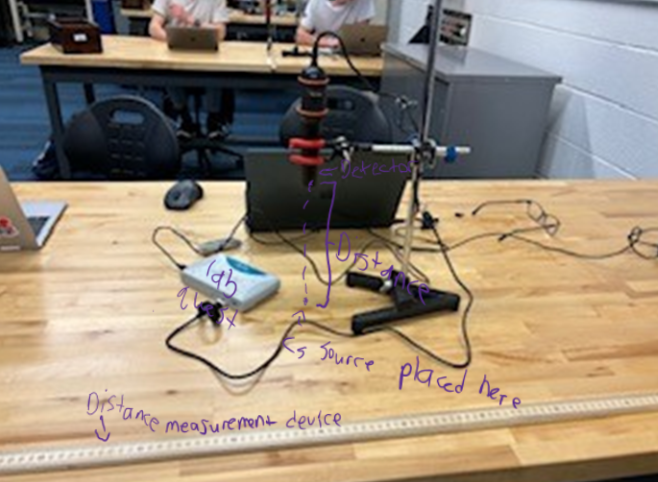


Data:
We started by measuring the radiation counts of the ambient environment.

In [1]:
#importing all potentioally necessary mods
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

import numpy as np

import scipy.optimize as opt

ambient = pd.read_excel("data/bg.xlsx")
#radiation in the room without influence from Cs


Next we measured the radiation count (counts/30s) from the cesium and room at various distances (meters) from the GM.


In [2]:
data = pd.read_excel("data/data.xlsx")

Analysis:
The analysis will consist of the organization and manipulation of data to analyze the relationship between distance and radiation count.

First, to adjust for the background radiation, the average of the ambient radiation measurements is subracted from the measured Cs radiation counts.



In [3]:
#Average of ambient radiation to be subracted from Radiation to isolate radiation from Cs
Acounts = ambient['Radiation (counts)']

amav = Acounts.mean()

In [4]:
#A new column is created for the Isolated Cs radiation measurements
data['Radiation (counts from Cs)'] = data['Radiation (counts)']-amav

The data  as collected was quite messy and out of order, so adjustments are made to organize the data. Additionally, I calculated the square root  for each Cs Radiation Count measurement to find the error due to random sampling.

In [5]:
#data sorting
data = data.sort_values(by=['Radiation (counts from Cs)'])
#error for the Radiation counts using the square root rule
data['sqrt (Radiation Counts Cs)']=[math.sqrt(i) for i in data['Radiation (counts from Cs)']]

This set of data is now large enough to begin graphing. First we create a model using the data collected along with some calculated data.

In [6]:
#Define a model to determine the values for our equation
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data['Distance (m)'],
                            data['Radiation (counts from Cs)'],
                            sigma=data['sqrt (Radiation Counts Cs)'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.2f}, {fitdA:.2f}')
print(f'{fitB:.2f}, {fitdB:.2f}')

7.26, 0.26
-1.87, 0.01


With the model created, we can plot the data points and their uncertainties with the model to get a visual representation of the work so far.

Text(0.5, 1.0, 'Distance dependence of Radiation')

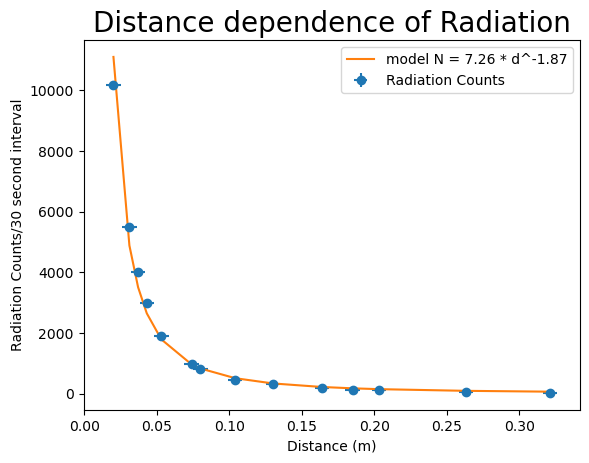

In [7]:
#graph the data and model to get a visual
plt.errorbar(data['Distance (m)'], data['Radiation (counts from Cs)'], yerr=data['sqrt (Radiation Counts Cs)'], 
             xerr=.005, fmt="o", label='Radiation Counts') 
plt.plot(data['Distance (m)'], linmodel(data['Distance (m)'], 
                                                   fitA, fitB), label='model N = 7.26 * d^-1.87')
#make it pretty
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Radiation Counts/30 second interval')
plt.title('Distance dependence of Radiation', fontsize = 20)

Because the ruler included millimeters, our uncertainty could have been as low as .05mm or .00005m, but because of difficulties in measurement, I decided to magnify the error by 2 orders of magnitude to .005m or 5mm.

Our power model is as follows: N = 7.26 * d^-1.87. Now, we need to make a linear model.

In [8]:
#Take the natural log of the variables N (radiation counts) and d (distance)
data['ln N']=[math.log(i) for i in data['Radiation (counts from Cs)']]
#propogate the error as well
data['lnN error']= [i for i in data['sqrt (Radiation Counts Cs)']/data['Radiation (counts from Cs)']]


data['ln d']=[math.log(i) for i in data['Distance (m)']]

data['lnd error']= [i for i in .005/data['Distance (m)']]

The data is now linearized and ready for graphing.

In [9]:
data


,Distance (m),Radiation (counts),Radiation (counts from Cs),sqrt (Radiation Counts Cs),ln N,lnN error,ln d,lnd error
11,0.321,34,24.9,4.989990,3.214868,0.200401,-1.136314,0.015576
12,0.263,72,62.9,7.930952,4.141546,0.126088,-1.335601,0.019011
13,0.203,109,99.9,9.994999,4.604170,0.100050,-1.594549,0.024631
0,0.185,133,123.9,11.131038,4.819475,0.089839,-1.687399,0.027027
1,0.164,191,181.9,13.487031,5.203457,0.074145,-1.807889,0.030488
2,0.130,318,308.9,17.575551,5.733018,0.056897,-2.040221,0.038462
3,0.104,471,461.9,21.491859,6.135348,0.046529,-2.263364,0.048077
5,0.080,829,819.9,28.633896,6.709182,0.034924,-2.525729,0.062500
4,0.074,981,971.9,31.175311,6.879253,0.032077,-2.603690,0.067568
6,0.053,1912,1902.9,43.622242,7.551134,0.022924,-2.937463,0.094340


In [10]:
#define an equation for our second model
def linmodel2(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel2, data['ln d'],
                                            data['ln N'], sigma=data['lnN error'],
                                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

In [11]:
#adjust for xerr
data['yerrto'] = np.sqrt((fitA * data['lnd error'])**2 + (data['lnN error'])**2)

In [12]:
#Define a model to determine the values for our equation, it should be linear
def linmodel(x, A, B):
    y = A*x+B
    return y
fit_param, fit_param_errors = opt.curve_fit( linmodel, data['ln d'],
                            data['ln N'],
                            sigma=data['yerrto'],
                            absolute_sigma=True)
# The value of A, the uncertainty in A
fitAx = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])
# The value of B, the uncertainty in B
fitBx = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])
#here are our values
print(f'{fitAx:.2f} +/- {fitdA:.2f}lnN/lnd')
print(f'{fitBx:.2f} +/- {fitdB:.2f}lnN')

-2.18 +/- 0.06lnN/lnd
1.18 +/- 0.14lnN


Text(0.5, 1.0, 'Natural log of Radiation counts & Distance for Linearization of Data')

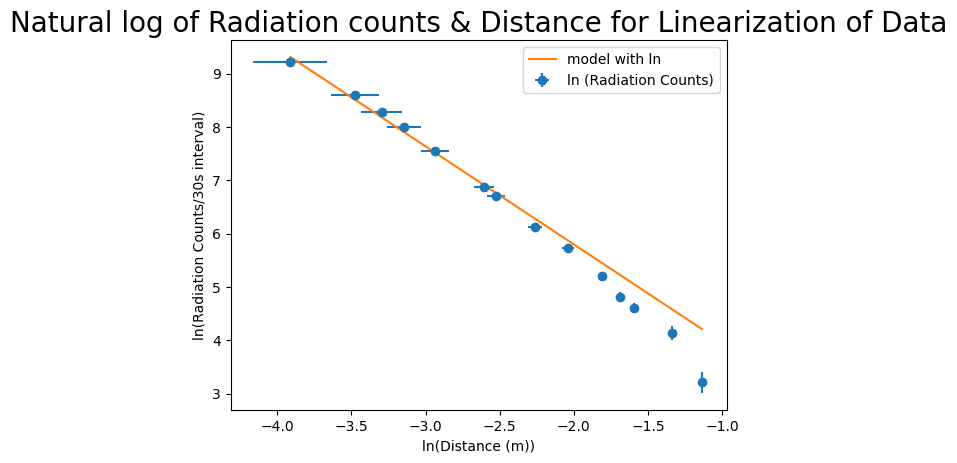

In [13]:
#graph the data
plt.errorbar(data['ln d'], data['ln N'], yerr=data['lnN error'], xerr=data['lnd error'], fmt="o", label='ln (Radiation Counts)')

plt.plot(data['ln d'], linmodel2(data['ln d'], fitA, fitB), label='model with ln')
plt.legend()
plt.xlabel('ln(Distance (m))')
plt.ylabel('ln(Radiation Counts/30s interval)')
plt.title('Natural log of Radiation counts & Distance for Linearization of Data', fontsize = 20)

 The natural log successfully linearized our data: our model is of the formula y = -2.18x + 1.18                                        

Results and Errors:

Here is the equation we end with :

lnN = -2.18 (+/-.06) lnd + 1.18(+-.14)

where N is counts/30s and d is distance in meters.

We determined our error for distance and radiation counts, propogated it through our calculations, and represented it in the graphs above. Distance was likely our primary source of error as it is proportionally much greater than counts which is apparent by observing the error bars on the graphs. Additionally, a small source of random error was the positioning of our Cesium puck as it was difficult to put it directly below the center of the GE even with the help of the plumbob.

Before the lab we theoretically predicted that the "B" value or exponent on the distance component should be -2. This means that as distance increases, the radiation intensity decreases geometrically as the inverse of the distance squared, which makes sense thinking about it physically. This relationship can be observed in other phenomena as well which may be demonstrated in future labs. performing a t-test, we get (2.18-2)/.06=3. Overall, solid results.